In [4]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi

from scipy.stats import norm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
def f(x):
    "Michalewicz function"
    return -1 * ( (np.sin(x[0]) * np.sin((1 * x[0]**2) / np.pi)**20) + \
           (np.sin(x[1]) * np.sin((2 * x[1]**2) / np.pi)**20) )

In [3]:
X = np.linspace(-5, 5, 2001)
Y = np.linspace(-5, 5, 2001)

Xm, Ym = np.meshgrid(X,Y)

Z = f([Xm,Ym])

# starting points

xstart = np.linspace(-4, 4, 10)
ystart = np.linspace(-4, 4, 10)

xstartm, ystartm = np.meshgrid(xstart,ystart)

xystart = np.array([xstartm.reshape(xstartm.size,1).flatten(), ystartm.reshape(ystartm.size,1).flatten()])

zstart = f(xystart)

In [4]:
def BayOpt(xystart ,f, niter):
    model = GaussianProcessRegressor(kernel=Matern(nu=5/2))
    zstart = f(xystart)

    X = np.linspace(-5, 5, 2001)
    Y = np.linspace(-5, 5, 2001)
    Xm, Ym = np.meshgrid(X,Y)
    Z = f([Xm,Ym])
    XY = np.array([Xm.reshape(Xm.size,1).flatten(), Ym.reshape(Ym.size,1).flatten()]).transpose()

    xyinput = xystart

    for i in range(niter):
            
        # fit the model
        model.fit(xyinput.transpose(), zstart)
        # predict values outside of the starting sample
        p1 = model.predict(XY, return_std=True) #technical reshape because of sklearn's requirements

        # traditional designation for the y values of the surrogate model
        mu = p1[0]

        # standard deviation of the estimates in the surrogate model
        sigma = p1[1]

        gamma = ( np.min(zstart) - mu) / sigma
        poi = norm.cdf(gamma)
        ei = sigma * (gamma * poi + norm.pdf(gamma))

        kappa = 1 # exploration intensity
        lcb = mu - kappa * sigma

        print(i)

        
        xynext = XY[np.argmin(lcb)]


        xnew = np.append(xstart, xynext[0])
        ynew = np.append(ystart, xynext[1])

        xnewm, ynewm = np.meshgrid(xnew,ynew)

        xynew = np.array([xnewm.reshape(xnewm.size,1).flatten(), ynewm.reshape(ynewm.size,1).flatten()])
        znew = f(xynew)

        print(xynext)
        print(f(xynext))

        xyinput = xynew
        zstart = znew

        plt.contourf(Xm, Ym, mu.reshape(2001,2001), levels = 20)
        plt.show()
        

    plt.contourf(Xm, Ym, Z, levels = 20)
    plt.show()
        # print(xnext)
        # print(f(xnext))
        # print(mu)
        # print(lcb)


    #     plt.contour(m1, m2, M, levels = 50)
    #     plt.plot(xstart.T[0],xstart.T[1], 'o', color = "red")
    #     plt.plot(xset.T[0], xset.T[1], 'o' , color = 'black', label = i)
    #     plt.plot(xnext[0], xnext[1], 'x' , color = 'red', label = i)
    #     plt.show()
    # #return(xnext, f(xnext))


0
[ 2.235 -5.   ]
-0.7845003780745345


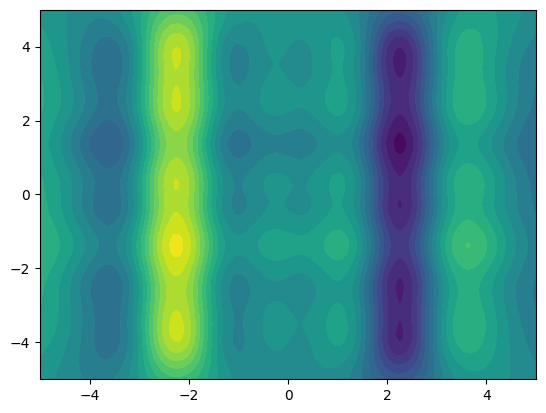

1
[2.045 1.64 ]
-1.3143894435997447


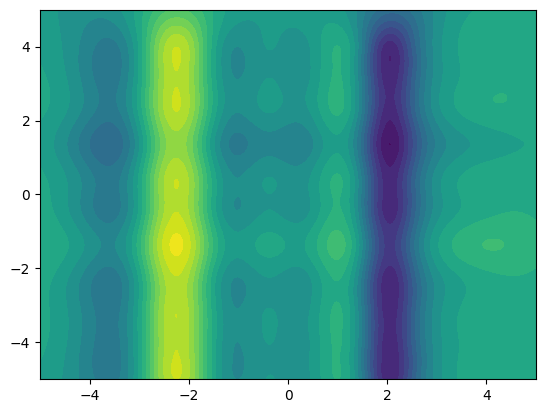

2
[2.485 1.75 ]
-0.3491063346305161


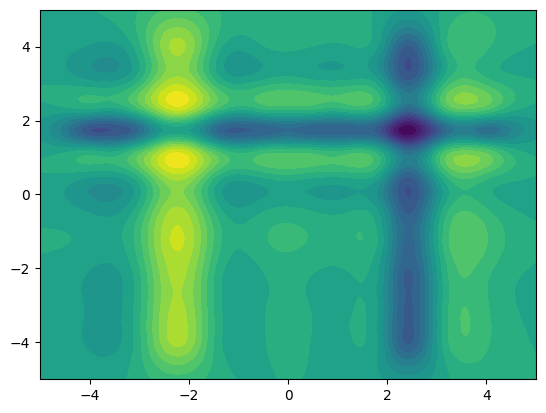

3
[1.93 1.66]
-0.9144527185504834


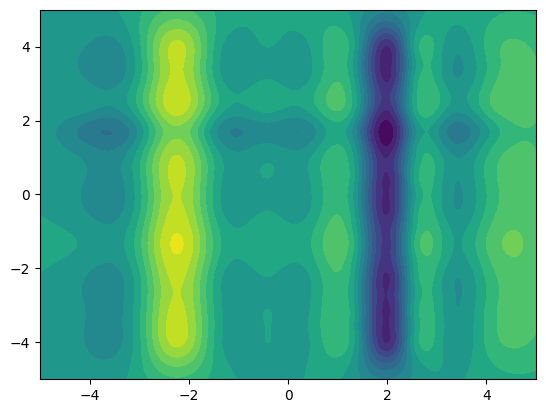

4
[2.495 1.75 ]
-0.3321531195402768


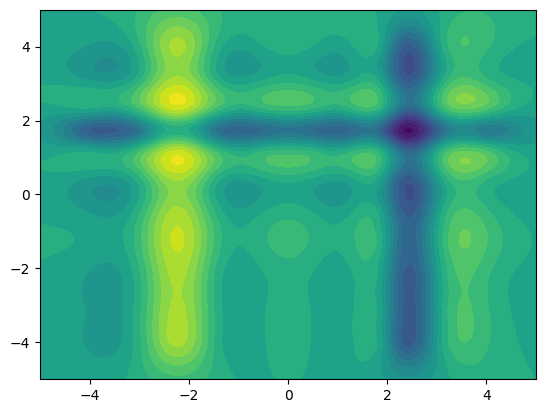

5
[1.93 1.66]
-0.9144527185504834


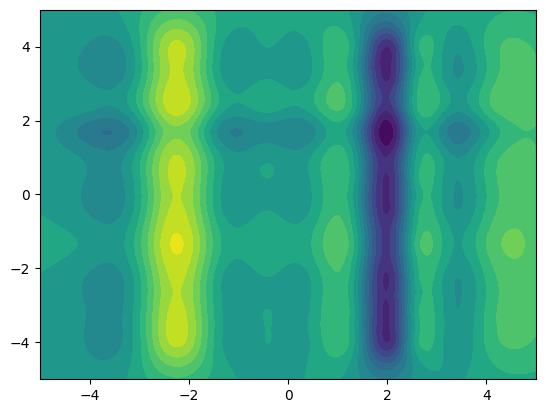

6
[2.495 1.75 ]
-0.3321531195402768


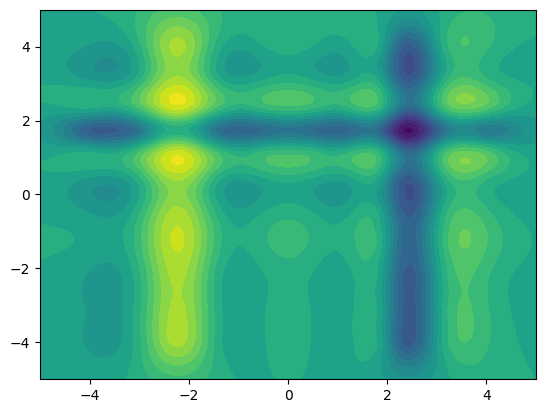

7
[1.93 1.66]
-0.9144527185504834


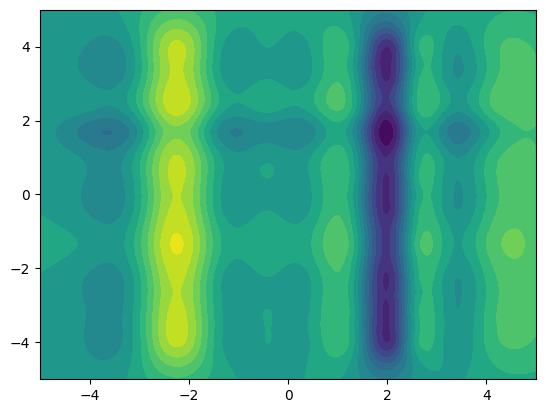

8
[2.495 1.75 ]
-0.3321531195402768


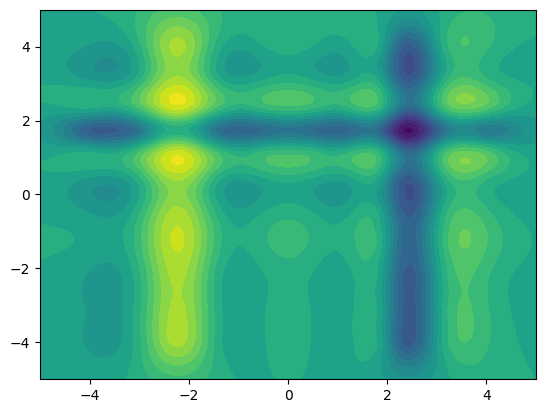

9
[1.93 1.66]
-0.9144527185504834


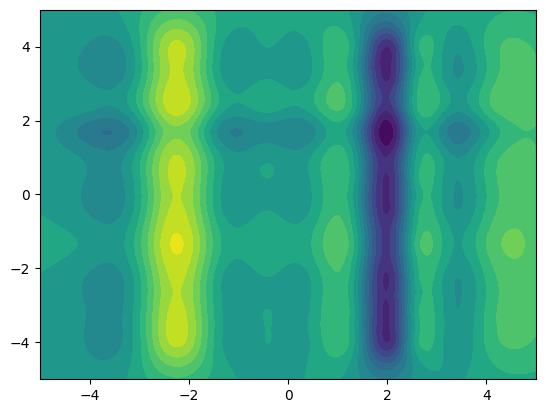

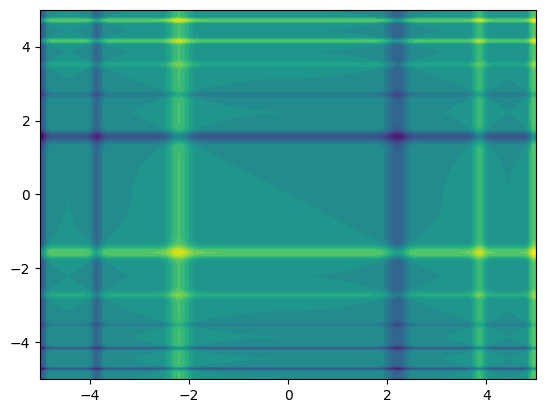

In [5]:

BayOpt(xystart ,f, 10)